In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from modules.qr_code import QrCode, Measurement

# Loading data
camera_columns = ['timestamp', 'qr_code', 'cx', 'cy', 'width', 'height', 'distance', 'attitude']

qr_df = pd.read_csv('../data/qr_code_position_in_global_coordinate.csv')
camera_df = pd.read_csv('../data/task5/camera_localization_task5.csv', header=None, names=camera_columns)

In [15]:
# Setting up required QR codes' data for the task

qr_codes = []
for index, row in qr_df.iterrows():
    if row['position_in_wall'] == 2 and row['qr_code'] != 13:
        qr = QrCode(int(row['qr_code']), row['mid_point_x_cm'], row['mid_point_y_cm'])
        qr_codes.append(qr)

for qr in qr_codes:
    for index, row in camera_df.iterrows():
        if row['qr_code'] == qr.id:
            qr.add_measurement(Measurement(row['timestamp'], row['cx'], row['height']))

In [16]:
#Compute the variances of the measurements
for qr in qr_codes:
    qr.compute_variance()

In [17]:
from modules.localization import Localization

localization = Localization(h0=11.5, path="../data/task3/camera_module_calibration_task3.csv", qr_codes=qr_codes, distance_bias=6.7)

In [18]:
localization.R_inv

array([[ 4.386,  0.   ],
       [ 0.   , 21.739]])

In [19]:
localization.localize(iteration_end=10, x_0=[55, 25, 70*np.pi/180])

In [20]:
Grid_size = 500
x1s = np.linspace(100,100, Grid_size) # creating linearly spaced values in the interval (0, 1)
x2s = np.linspace(100,100, Grid_size)
x_grid,y_grid = np.meshgrid(x1s,x2s) # creating rectangular grid
J = np.zeros((Grid_size,Grid_size))

Estimation(px=51.29044408466089, py=36.92499274603366, psi=1.4512509403857774)
Estimation(px=53.18488461908336, py=34.71806762200551, psi=1.4554968902003833)
Estimation(px=54.645643834185705, py=32.54761499921018, psi=1.4499718667916757)
Estimation(px=55.36880536435835, py=29.77632223969566, psi=1.4546585127058054)
Estimation(px=56.201322664126764, py=30.956847189683536, psi=1.4610468503531806)
Estimation(px=58.20408274653568, py=34.82291024025669, psi=1.4737175799055224)
Estimation(px=60.48221136797041, py=37.3081928465094, psi=1.4870239892987895)
Estimation(px=64.51131140931871, py=41.393446865402616, psi=1.4885809254831768)
56.73608826127999
34.80604934359966
83.95083292830179


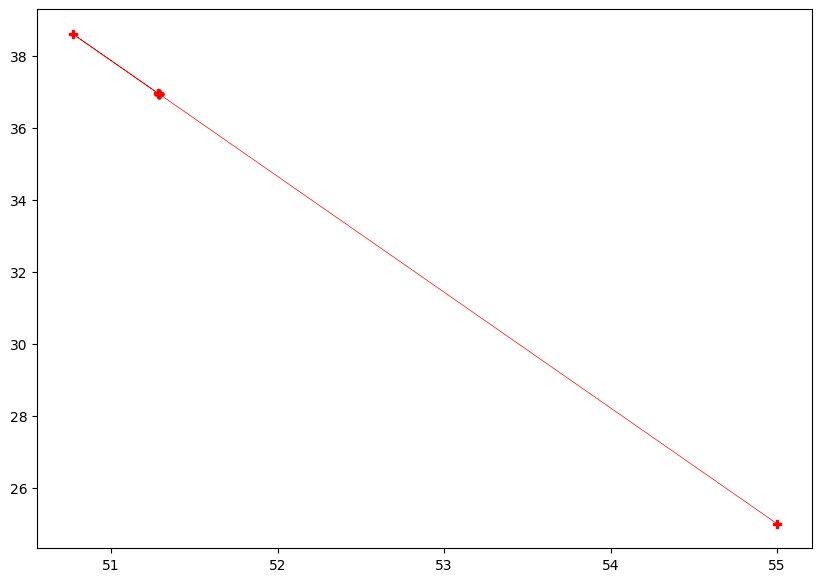

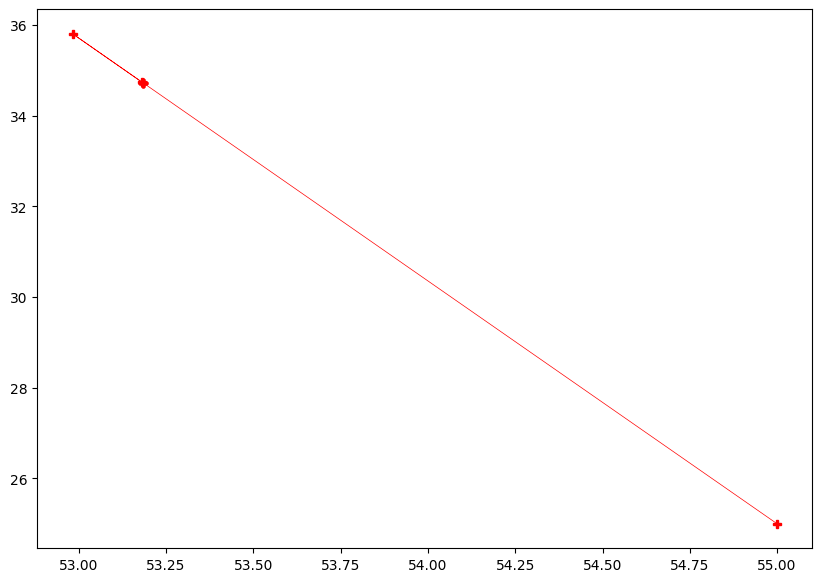

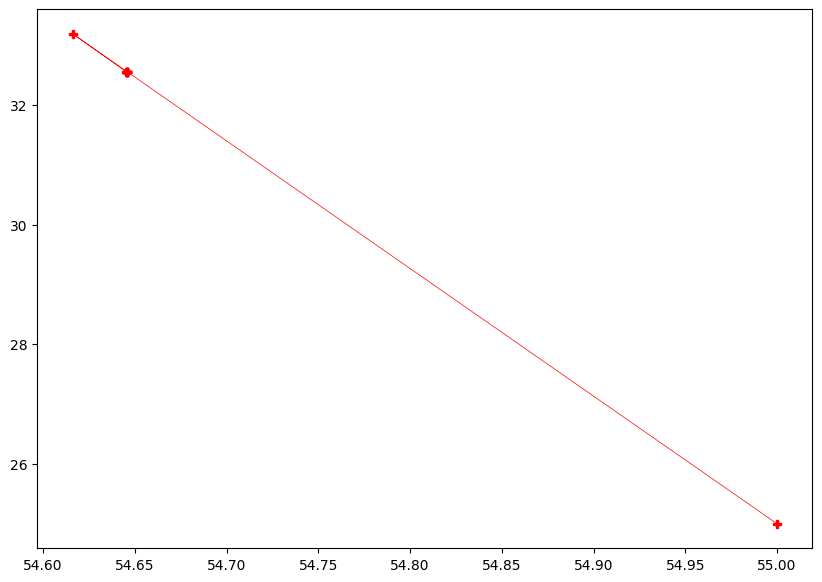

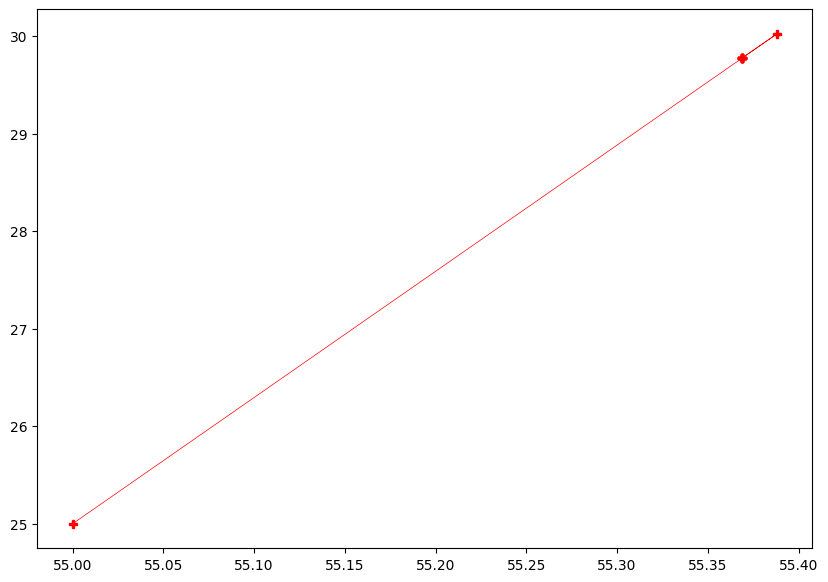

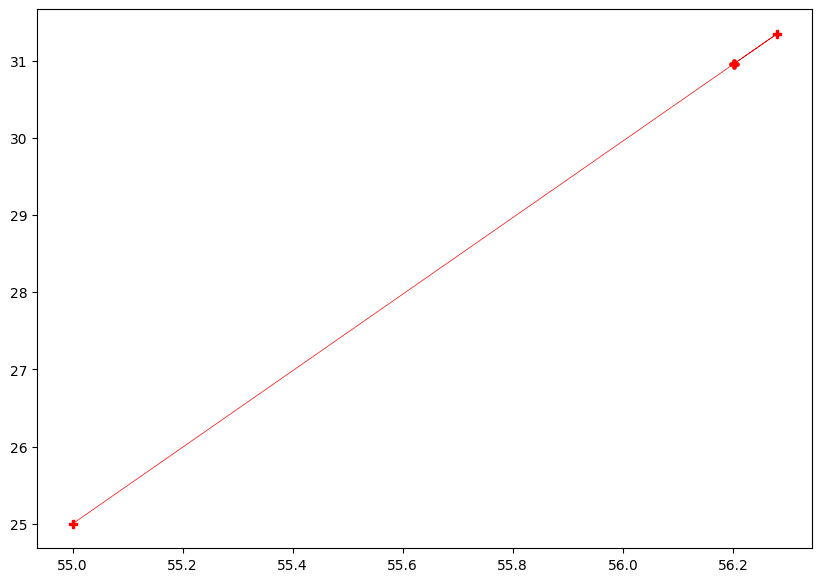

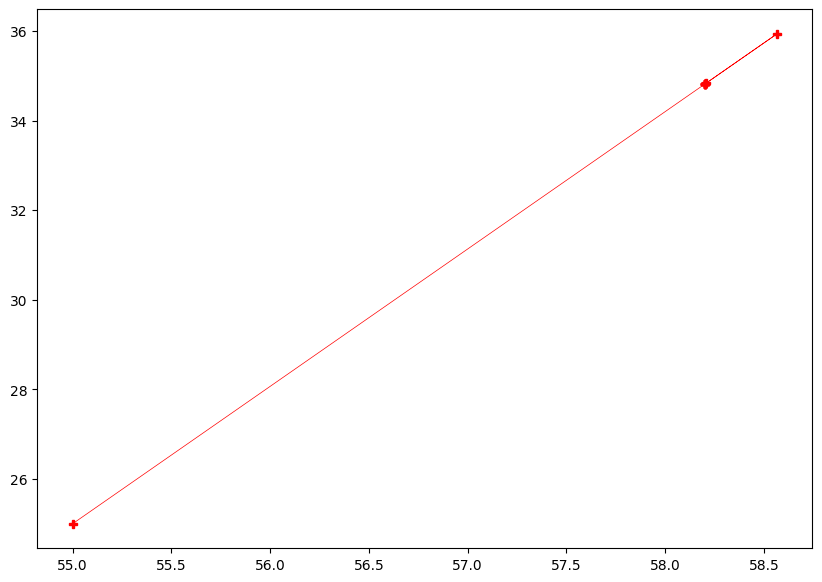

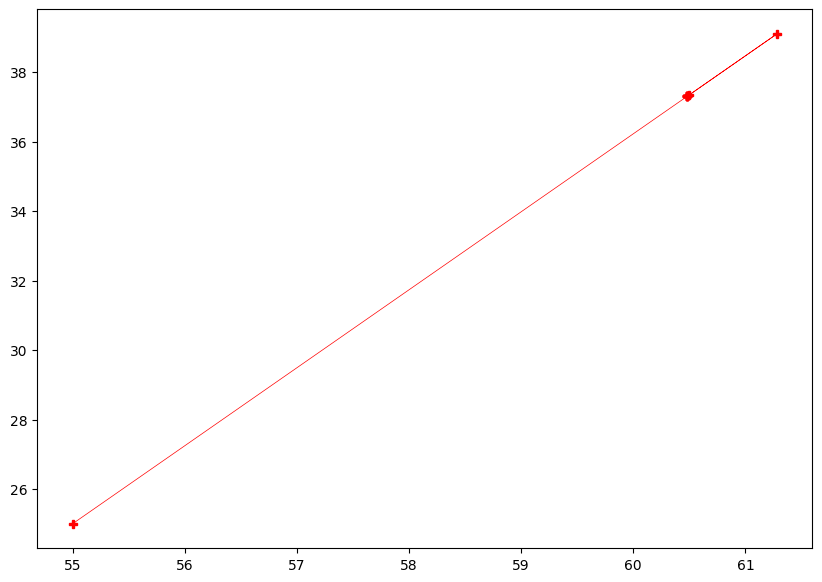

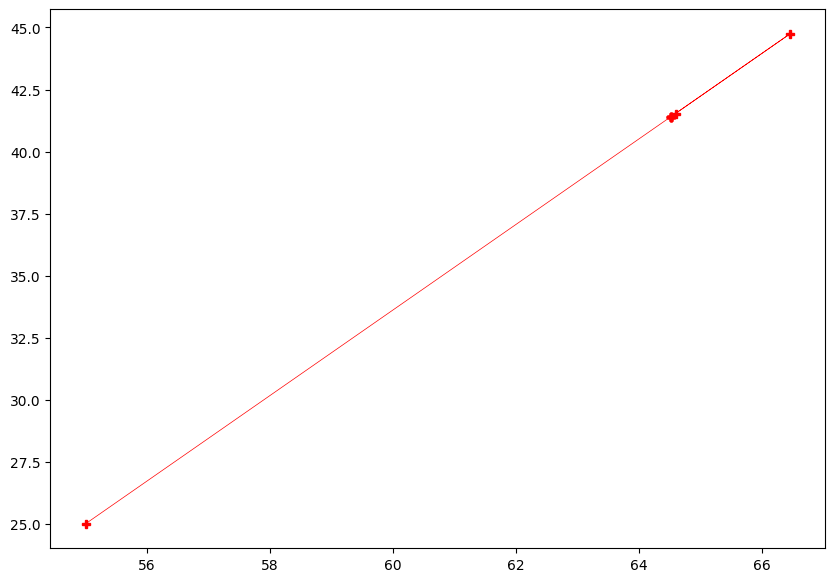

In [21]:
x_sum = 0
y_sum = 0
psi_sum = 0
for qr in qr_codes:
    print(qr.estimation[-1])
    plt.figure(figsize=(10,7))
    # plt.contourf(x_grid,y_grid,J, 100)
    plt.plot([[estimation.px] for estimation in qr.estimation],[[estimation.py] for estimation in qr.estimation],c='r',marker="P",linewidth=0.5)
    # print(np.mean(qr.estimation))
    # print(np.mean([[estimation.py] for estimation in qr.estimation]))
    qr.estimation[-1]
    x_sum += qr.estimation[-1].px
    y_sum += qr.estimation[-1].py
    psi_sum += qr.estimation[-1].psi
print(x_sum/len(qr_codes))
print(y_sum/len(qr_codes))
print(psi_sum/len(qr_codes)*180/np.pi)